# Data Preparation & EDA

## Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load Data

In [2]:
pirates = pd.read_csv('data/pirates_of_caribbean.csv')
metadata = pd.read_csv('data/metadata.csv')

## Pirates of the Caribbean Data

In [3]:
pirates.head()

,date,datetime,SACTMIN,SPOSTMIN
0,1/1/2016,1/1/2016 8:07,NaN,5.0
1,1/1/2016,1/1/2016 8:14,NaN,5.0
2,1/1/2016,1/1/2016 8:21,NaN,5.0
3,1/1/2016,1/1/2016 8:27,NaN,5.0
4,1/1/2016,1/1/2016 8:29,NaN,5.0


In [4]:
pirates.tail()

,date,datetime,SACTMIN,SPOSTMIN
213819,3/4/2021,3/4/2021 18:33,NaN,35.0
213820,3/4/2021,3/4/2021 18:40,NaN,35.0
213821,3/4/2021,3/4/2021 18:47,NaN,35.0
213822,3/4/2021,3/4/2021 18:49,NaN,30.0
213823,3/4/2021,3/4/2021 19:00,NaN,30.0


In [5]:
pirates.shape

(213824, 4)

In [6]:
pirates.describe()

,SACTMIN,SPOSTMIN
count,7007.000000,206817.000000
mean,19.191380,-52.697394
std,13.313971,278.531120
min,0.000000,-999.000000
25%,9.000000,10.000000
50%,17.000000,25.000000
75%,27.000000,40.000000
max,101.000000,185.000000


#### Column Types

In [7]:
# check column types
pirates.dtypes

date         object
datetime     object
SACTMIN     float64
SPOSTMIN    float64
dtype: object

In [8]:
# change dates column to datetime format 
pirates['datetime'] = pd.to_datetime(pirates['datetime'])

pirates['date'] = pd.to_datetime(pirates['date'])

In [9]:
# verify column types
pirates.dtypes

date        datetime64[ns]
datetime    datetime64[ns]
SACTMIN            float64
SPOSTMIN           float64
dtype: object

#### Missing Values

In [10]:
# missing values
pirates.isnull().sum()

date             0
datetime         0
SACTMIN     206817
SPOSTMIN      7007
dtype: int64

In [11]:
# fill SPOSTMIN with SACTMIN if SPOSTMIN contains missing value. This is filling posted wait time with actual wait time.
pirates['SPOSTMIN'] = pirates.apply(lambda row: row['SACTMIN'] if np.isnan(row['SPOSTMIN']) else row['SPOSTMIN'], axis=1)

In [12]:
pirates.isnull().sum()

date             0
datetime         0
SACTMIN     206817
SPOSTMIN         0
dtype: int64

#### Drop & Rename Columns

In [13]:
pirates.drop(labels=['SACTMIN'], axis=1, inplace=True)

In [14]:
pirates.rename(columns={'SPOSTMIN': 'wait_time'}, inplace=True)

In [15]:
pirates.head()

,date,datetime,wait_time
0,2016-01-01,2016-01-01 08:07:00,5.0
1,2016-01-01,2016-01-01 08:14:00,5.0
2,2016-01-01,2016-01-01 08:21:00,5.0
3,2016-01-01,2016-01-01 08:27:00,5.0
4,2016-01-01,2016-01-01 08:29:00,5.0


### EDA Plots for Pirates Data

In [16]:
pd.plotting.register_matplotlib_converters()

Plot a histogram to check for outliers and distribution. Can see -999 is not a real wait time. This signifies downtime.

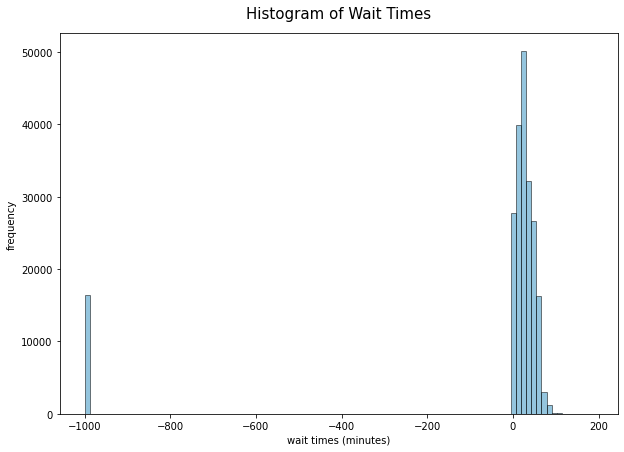

In [17]:
num_bins = 100

fig, ax = plt.subplots(figsize = (10,7))

n, bins, patches = ax.hist(pirates['wait_time'], num_bins, facecolor='#2b8cbe', alpha=0.5, edgecolor='#000000', linewidth=1)

ax.set_title('Histogram of Wait Times', fontsize = 15, pad=15)
ax.set_xlabel('wait times (minutes)')
ax.set_ylabel('frequency')

plt.show()

Plot all the dates to see if anything is missing and range the data covers.

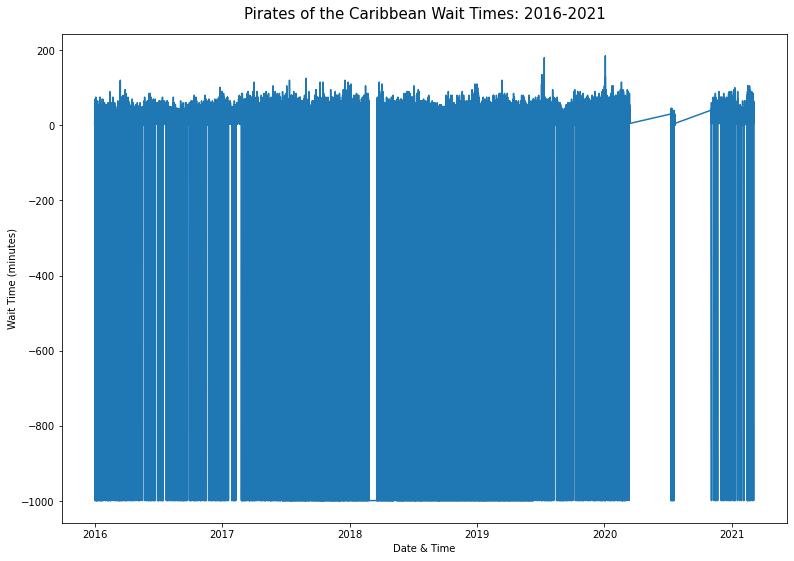

In [18]:
fig, ax = plt.subplots(figsize = (13,9))

ax.plot(pirates['datetime'], pirates['wait_time'])

ax.set_title('Pirates of the Caribbean Wait Times: 2016-2021', pad=15, fontsize = 15)
ax.set_xlabel('Date & Time')
ax.set_ylabel('Wait Time (minutes)')

plt.show()

All times the attraction was reported as downtime, -999, will be forward filled with the previous wait time.

In [19]:
# change -999 to NaN
pirates = pirates.replace(-999, np.nan)

# forward fill missing values to take the previous wait time
pirates.fillna(method='ffill', inplace=True)

In [20]:
# verify missing values again
pirates.isnull().sum()

date         0
datetime     0
wait_time    0
dtype: int64

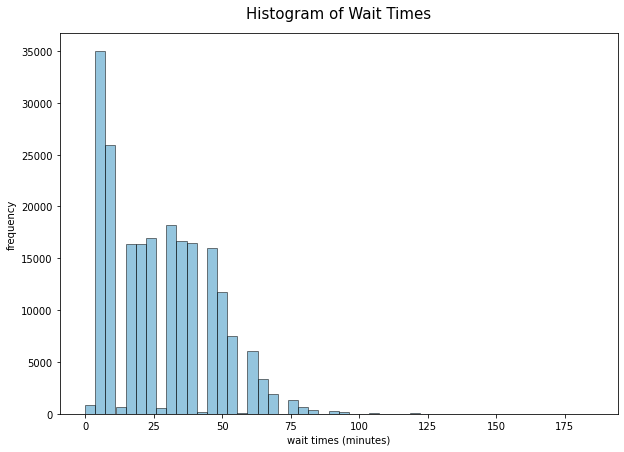

In [21]:
# revised histogram
num_bins = 50

fig, ax = plt.subplots(figsize = (10,7))

n, bins, patches = ax.hist(pirates['wait_time'], num_bins, facecolor='#2b8cbe', alpha=0.5, edgecolor='#000000', linewidth=1)

ax.set_title('Histogram of Wait Times', fontsize = 15, pad=15)
ax.set_xlabel('wait times (minutes)')
ax.set_ylabel('frequency')

plt.show()

In [22]:
# filter years 2016-2019 for final dataset
pirates = pirates.loc[(pirates['datetime'].dt.year >= 2016) & (pirates['datetime'].dt.year <= 2019)]

pirates

,date,datetime,wait_time
0,2016-01-01,2016-01-01 08:07:00,5.0
1,2016-01-01,2016-01-01 08:14:00,5.0
2,2016-01-01,2016-01-01 08:21:00,5.0
3,2016-01-01,2016-01-01 08:27:00,5.0
4,2016-01-01,2016-01-01 08:29:00,5.0
...,...,...,...
190905,2019-12-31,2019-12-31 23:27:00,15.0
190906,2019-12-31,2019-12-31 23:34:00,10.0
190907,2019-12-31,2019-12-31 23:41:00,10.0
190908,2019-12-31,2019-12-31 23:48:00,10.0


In [23]:
pirates.describe()

,wait_time
count,190910.000000
mean,26.655691
std,18.133411
min,0.000000
25%,10.000000
50%,25.000000
75%,40.000000
max,180.000000


Max wait time: 180 minutes

Min wait time: 0 minutes

Mean wait time: 26.66 minutes

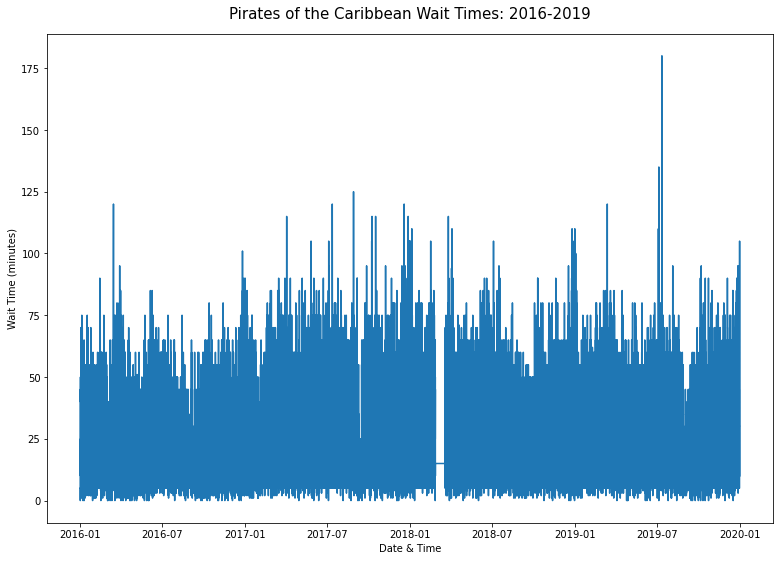

In [24]:
fig, ax = plt.subplots(figsize = (13,9))

ax.plot(pirates['datetime'], pirates['wait_time'])

ax.set_title('Pirates of the Caribbean Wait Times: 2016-2019', pad=15, fontsize = 15)
ax.set_xlabel('Date & Time')
ax.set_ylabel('Wait Time (minutes)')

plt.show()

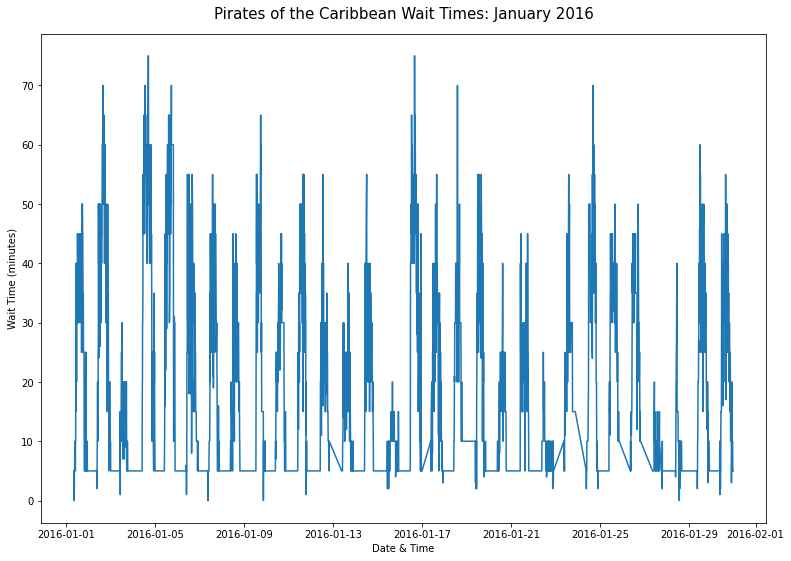

In [25]:
# one month
jan_16 = pirates.loc[(pirates['datetime'] >= '2016-01-01') & (pirates['datetime'] <= '2016-01-31')]

fig, ax = plt.subplots(figsize = (13,9))

ax.plot(jan_16['datetime'], jan_16['wait_time'])

ax.set_title('Pirates of the Caribbean Wait Times: January 2016', pad=15, fontsize = 15)
ax.set_xlabel('Date & Time')
ax.set_ylabel('Wait Time (minutes)')

plt.show()

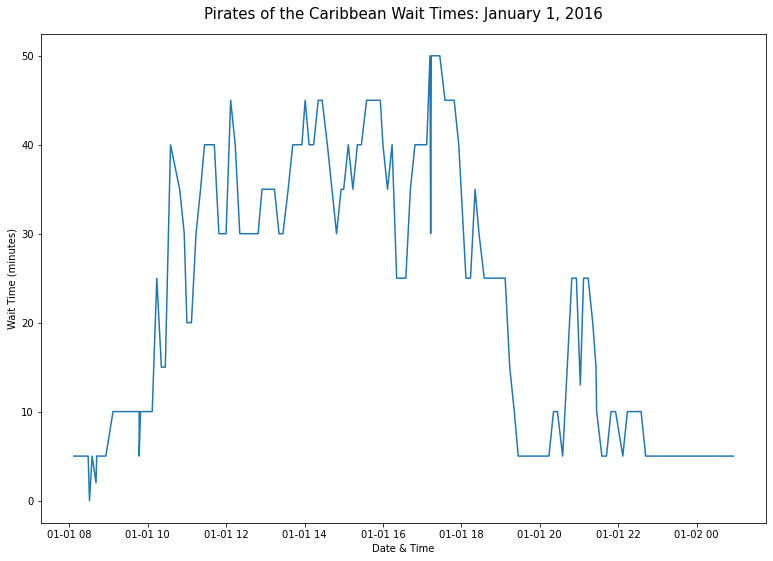

In [26]:
# one day
jan_first = pirates.loc[(pirates['date'] == '2016-01-01')]

fig, ax = plt.subplots(figsize = (13,9))

ax.plot(jan_first['datetime'], jan_first['wait_time'])

ax.set_title('Pirates of the Caribbean Wait Times: January 1, 2016', pad=15, fontsize = 15)
ax.set_xlabel('Date & Time')
ax.set_ylabel('Wait Time (minutes)')

plt.show()

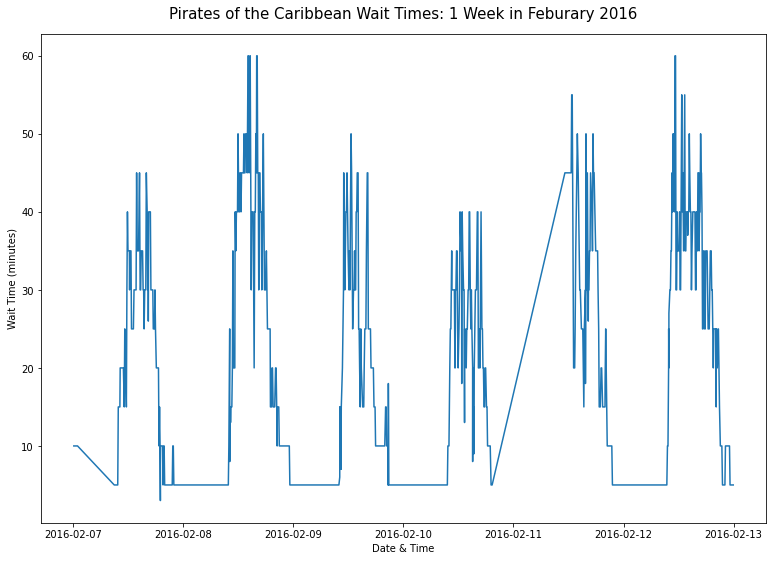

In [27]:
# one week in an off season
feb_week = pirates.loc[(pirates['datetime'] >= '2016-02-07') & (pirates['datetime'] <= '2016-02-13')]

fig, ax = plt.subplots(figsize = (13,9))

ax.plot(feb_week['datetime'], feb_week['wait_time'])

ax.set_title('Pirates of the Caribbean Wait Times: 1 Week in Feburary 2016', pad=15, fontsize = 15)
ax.set_xlabel('Date & Time')
ax.set_ylabel('Wait Time (minutes)')

plt.show()

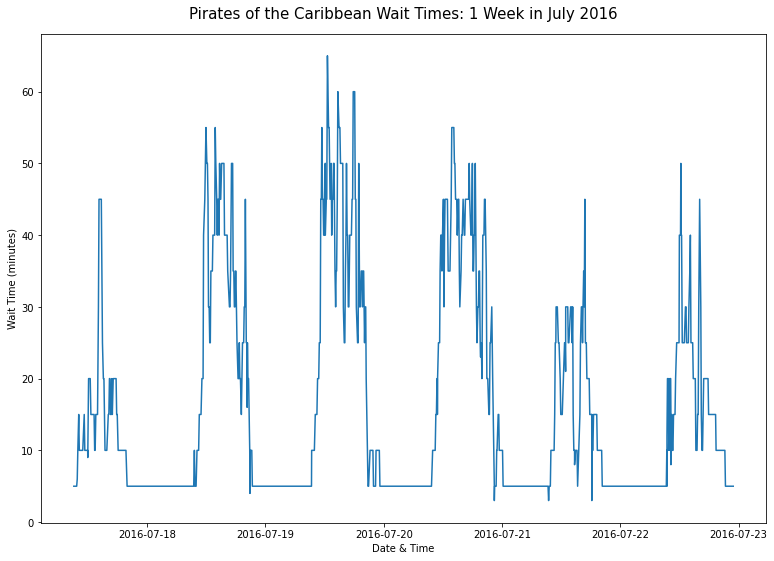

In [28]:
# one week in summer
july_week = pirates.loc[(pirates['datetime'] >= '2016-07-17') & (pirates['datetime'] <= '2016-07-23')]

fig, ax = plt.subplots(figsize = (13,9))

ax.plot(july_week['datetime'], july_week['wait_time'])

ax.set_title('Pirates of the Caribbean Wait Times: 1 Week in July 2016', pad=15, fontsize = 15)
ax.set_xlabel('Date & Time')
ax.set_ylabel('Wait Time (minutes)')

plt.show()

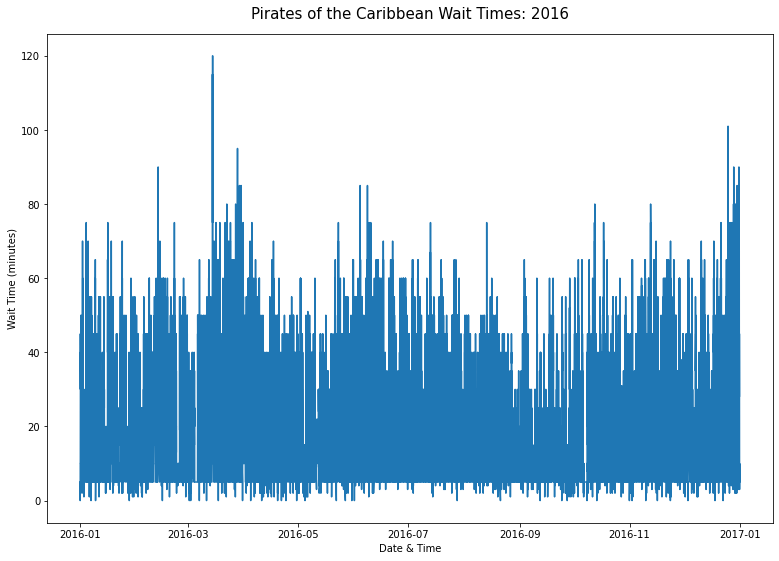

In [29]:
sixteen = pirates[(pirates['datetime'].dt.year==2016)]

fig, ax = plt.subplots(figsize = (13,9))

ax.plot(sixteen['datetime'], sixteen['wait_time'])

ax.set_title('Pirates of the Caribbean Wait Times: 2016', pad=15, fontsize = 15)
ax.set_xlabel('Date & Time')
ax.set_ylabel('Wait Time (minutes)')

plt.show()

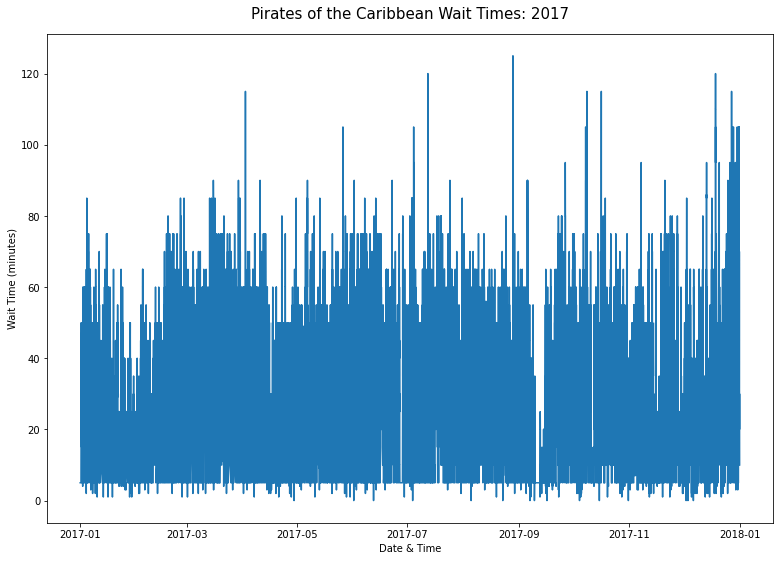

In [30]:
seventeen = pirates[(pirates['datetime'].dt.year==2017)]

fig, ax = plt.subplots(figsize = (13,9))

ax.plot(seventeen['datetime'], seventeen['wait_time'])

ax.set_title('Pirates of the Caribbean Wait Times: 2017', pad=15, fontsize = 15)
ax.set_xlabel('Date & Time')
ax.set_ylabel('Wait Time (minutes)')

plt.show()

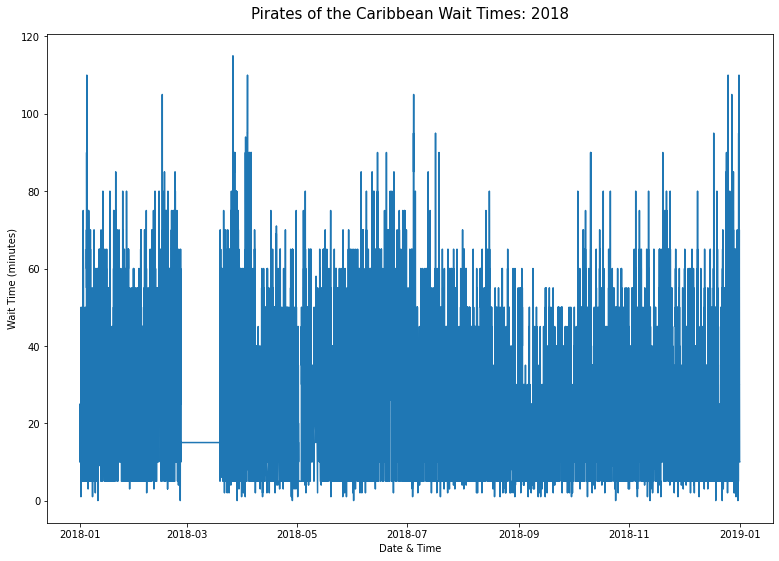

In [31]:
eighteen = pirates[(pirates['datetime'].dt.year==2018)]

fig, ax = plt.subplots(figsize = (13,9))

ax.plot(eighteen['datetime'], eighteen['wait_time'])

ax.set_title('Pirates of the Caribbean Wait Times: 2018', pad=15, fontsize = 15)
ax.set_xlabel('Date & Time')
ax.set_ylabel('Wait Time (minutes)')

plt.show()

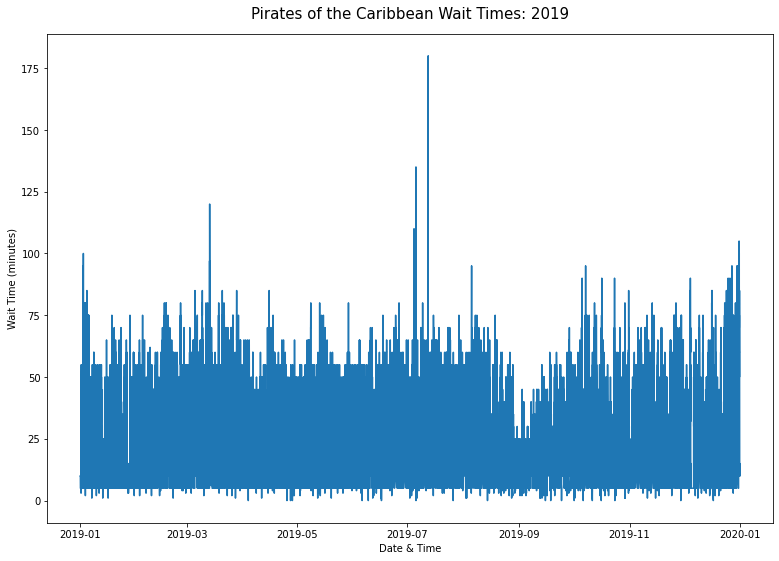

In [32]:
nineteen = pirates[(pirates['datetime'].dt.year==2019)]

fig, ax = plt.subplots(figsize = (13,9))

ax.plot(nineteen['datetime'], nineteen['wait_time'])

ax.set_title('Pirates of the Caribbean Wait Times: 2019', pad=15, fontsize = 15)
ax.set_xlabel('Date & Time')
ax.set_ylabel('Wait Time (minutes)')

plt.show()

#### Gap in Feb/March 2018

Single out the gap and fill in the missing data by averaging those dates from 2017 and 2019.

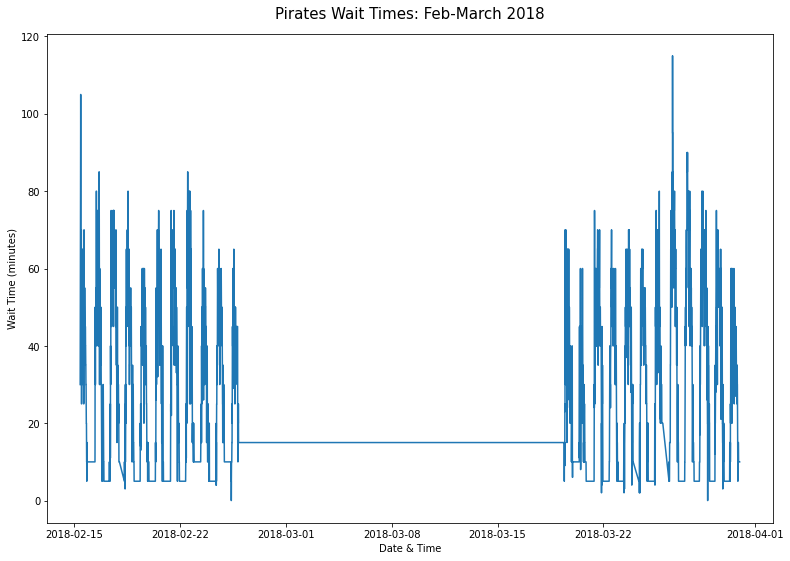

In [33]:
march_18 = pirates.loc[(pirates['datetime'] >= '2018-02-15') & (pirates['datetime'] <= '2018-03-31')]

fig, ax = plt.subplots(figsize = (13,9))

ax.plot(march_18['datetime'], march_18['wait_time'])

ax.set_title('Pirates Wait Times: Feb-March 2018', pad=15, fontsize = 15)
ax.set_xlabel('Date & Time')
ax.set_ylabel('Wait Time (minutes)')

plt.show()

In [34]:
gap = []
for date in march_18.date:
    if date not in gap:
        gap.append(date)
print(gap)

[Timestamp('2018-02-15 00:00:00'), Timestamp('2018-02-16 00:00:00'), Timestamp('2018-02-17 00:00:00'), Timestamp('2018-02-18 00:00:00'), Timestamp('2018-02-19 00:00:00'), Timestamp('2018-02-20 00:00:00'), Timestamp('2018-02-21 00:00:00'), Timestamp('2018-02-22 00:00:00'), Timestamp('2018-02-23 00:00:00'), Timestamp('2018-02-24 00:00:00'), Timestamp('2018-02-25 00:00:00'), Timestamp('2018-03-19 00:00:00'), Timestamp('2018-03-20 00:00:00'), Timestamp('2018-03-21 00:00:00'), Timestamp('2018-03-22 00:00:00'), Timestamp('2018-03-23 00:00:00'), Timestamp('2018-03-24 00:00:00'), Timestamp('2018-03-25 00:00:00'), Timestamp('2018-03-26 00:00:00'), Timestamp('2018-03-27 00:00:00'), Timestamp('2018-03-28 00:00:00'), Timestamp('2018-03-29 00:00:00'), Timestamp('2018-03-30 00:00:00')]


Attraction downtime was from 2018-02-26 to 2018-03-18.

In [35]:
march_17 = pirates.loc[(pirates['datetime'] >= '2017-02-26') & (pirates['datetime'] < '2017-03-19')]
march_19 = pirates.loc[(pirates['datetime'] >= '2019-02-26') & (pirates['datetime'] < '2019-03-19')]

In [36]:
march_17['day_time'] = march_17['datetime'].dt.strftime('%m-%d %H:%M:%S')
march_19['day_time'] = march_19['datetime'].dt.strftime('%m-%d %H:%M:%S')

C:\Users\Torrey\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Torrey\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [37]:
march_19

,date,datetime,wait_time,day_time
149426,2019-02-26,2019-02-26 08:00:00,10.0,02-26 08:00:00
149427,2019-02-26,2019-02-26 08:07:00,10.0,02-26 08:07:00
149428,2019-02-26,2019-02-26 08:14:00,10.0,02-26 08:14:00
149429,2019-02-26,2019-02-26 08:21:00,10.0,02-26 08:21:00
149430,2019-02-26,2019-02-26 08:27:00,10.0,02-26 08:27:00
...,...,...,...,...
152449,2019-03-18,2019-03-18 22:14:00,10.0,03-18 22:14:00
152450,2019-03-18,2019-03-18 22:21:00,10.0,03-18 22:21:00
152451,2019-03-18,2019-03-18 22:27:00,10.0,03-18 22:27:00
152452,2019-03-18,2019-03-18 22:35:00,10.0,03-18 22:35:00


In [38]:
the_gap = pd.merge(march_17, march_19, 
               how='outer', on='day_time')

the_gap

,date_x,datetime_x,wait_time_x,day_time,date_y,datetime_y,wait_time_y
0,2017-02-26,2017-02-26 09:07:00,10.0,02-26 09:07:00,2019-02-26,2019-02-26 09:07:00,10.0
1,2017-02-26,2017-02-26 09:14:00,5.0,02-26 09:14:00,2019-02-26,2019-02-26 09:14:00,5.0
2,2017-02-26,2017-02-26 09:21:00,5.0,02-26 09:21:00,2019-02-26,2019-02-26 09:21:00,15.0
3,2017-02-26,2017-02-26 09:27:00,5.0,02-26 09:27:00,2019-02-26,2019-02-26 09:27:00,15.0
4,2017-02-26,2017-02-26 09:35:00,5.0,02-26 09:35:00,2019-02-26,2019-02-26 09:35:00,15.0
...,...,...,...,...,...,...,...
3314,NaT,NaT,NaN,03-18 19:40:00,2019-03-18,2019-03-18 19:40:00,10.0
3315,NaT,NaT,NaN,03-18 20:04:00,2019-03-18,2019-03-18 20:04:00,16.0
3316,NaT,NaT,NaN,03-18 20:04:00,2019-03-18,2019-03-18 20:04:00,40.0
3317,NaT,NaT,NaN,03-18 21:00:00,2019-03-18,2019-03-18 21:00:00,10.0


In [39]:
# take the mean of 2017 and 2019 wait times and create new column
the_gap['wait_time'] = the_gap[['wait_time_x', 'wait_time_y']].mean(axis=1)
the_gap.head()

,date_x,datetime_x,wait_time_x,day_time,date_y,datetime_y,wait_time_y,wait_time
0,2017-02-26,2017-02-26 09:07:00,10.0,02-26 09:07:00,2019-02-26,2019-02-26 09:07:00,10.0,10.0
1,2017-02-26,2017-02-26 09:14:00,5.0,02-26 09:14:00,2019-02-26,2019-02-26 09:14:00,5.0,5.0
2,2017-02-26,2017-02-26 09:21:00,5.0,02-26 09:21:00,2019-02-26,2019-02-26 09:21:00,15.0,10.0
3,2017-02-26,2017-02-26 09:27:00,5.0,02-26 09:27:00,2019-02-26,2019-02-26 09:27:00,15.0,10.0
4,2017-02-26,2017-02-26 09:35:00,5.0,02-26 09:35:00,2019-02-26,2019-02-26 09:35:00,15.0,10.0


In [40]:
the_gap.dtypes

date_x         datetime64[ns]
datetime_x     datetime64[ns]
wait_time_x           float64
day_time               object
date_y         datetime64[ns]
datetime_y     datetime64[ns]
wait_time_y           float64
wait_time             float64
dtype: object

In [41]:
# create new column datetime and add 2018- to the front of the string day_time
the_gap['datetime'] = '2018-' + the_gap['day_time'].astype(str)

# change type of datetime from string to pd.datetime
the_gap['datetime'] = pd.to_datetime(the_gap['datetime'])

# create new column called date
the_gap['date'] = the_gap['datetime'].dt.strftime('%Y-%m-%d')

# drop columns
the_gap = pd.DataFrame(the_gap, columns = ['date', 'datetime', 'wait_time'])

In [42]:
the_gap.dtypes

date                 object
datetime     datetime64[ns]
wait_time           float64
dtype: object

In [43]:
# convert date to pd.datetime
the_gap['date'] = pd.to_datetime(the_gap['date'])

In [44]:
the_gap.head()

,date,datetime,wait_time
0,2018-02-26,2018-02-26 09:07:00,10.0
1,2018-02-26,2018-02-26 09:14:00,5.0
2,2018-02-26,2018-02-26 09:21:00,10.0
3,2018-02-26,2018-02-26 09:27:00,10.0
4,2018-02-26,2018-02-26 09:35:00,10.0


In [45]:
# separate time gap into two sections
first_half = pirates.loc[(pirates['datetime'] < '2018-02-26')]
second_half = pirates.loc[(pirates['datetime'] >= '2018-03-19')]

In [46]:
first_half.tail()

,date,datetime,wait_time
98510,2018-02-25,2018-02-25 20:42:00,20.0
98511,2018-02-25,2018-02-25 20:49:00,25.0
98512,2018-02-25,2018-02-25 20:56:00,20.0
98513,2018-02-25,2018-02-25 21:00:00,15.0
98514,2018-02-25,2018-02-25 21:07:00,15.0


In [47]:
pirates = first_half.append(the_gap)

In [48]:
pirates.tail()

,date,datetime,wait_time
3314,2018-03-18,2018-03-18 19:40:00,10.0
3315,2018-03-18,2018-03-18 20:04:00,16.0
3316,2018-03-18,2018-03-18 20:04:00,40.0
3317,2018-03-18,2018-03-18 21:00:00,10.0
3318,2018-03-18,2018-03-18 21:56:00,10.0


In [49]:
pirates = pirates.append(second_half)
pirates.tail()

,date,datetime,wait_time
190905,2019-12-31,2019-12-31 23:27:00,15.0
190906,2019-12-31,2019-12-31 23:34:00,10.0
190907,2019-12-31,2019-12-31 23:41:00,10.0
190908,2019-12-31,2019-12-31 23:48:00,10.0
190909,2019-12-31,2019-12-31 23:55:00,10.0


## Metadata Data

In [50]:
metadata.head()

,DATE,WDW_TICKET_SEASON,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,SEASON,HOLIDAYPX,HOLIDAYM,...,HSFIREWKS,AKPRDDAY,AKPRDDT1,AKPRDDT2,AKPRDDN,AKFIREN,AKSHWNGT,AKSHWNT1,AKSHWNT2,AKSHWNN
0,1/1/2015,NaN,5,0,0,1,2015,NaN,1,0,...,1,0,8:00,0:00,16.0,16:45,NaN,NaN,NaN,NaN
1,1/2/2015,NaN,6,1,0,1,2015,NaN,1,0,...,1,0,8:00,0:00,16.0,17:45,NaN,NaN,NaN,NaN
2,1/3/2015,NaN,7,2,0,1,2015,NaN,1,0,...,1,0,8:00,0:00,16.0,17:45,NaN,NaN,NaN,NaN
3,1/4/2015,NaN,1,3,1,1,2015,NaN,1,0,...,1,0,8:00,0:00,16.0,17:45,NaN,NaN,NaN,NaN
4,1/5/2015,NaN,2,4,1,1,2015,NaN,1,0,...,1,0,8:00,23:00,15.0,NaN,NaN,NaN,NaN,NaN


In [51]:
metadata.tail()

,DATE,WDW_TICKET_SEASON,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,SEASON,HOLIDAYPX,HOLIDAYM,...,HSFIREWKS,AKPRDDAY,AKPRDDT1,AKPRDDT2,AKPRDDN,AKFIREN,AKSHWNGT,AKSHWNT1,AKSHWNT2,AKSHWNN
2128,12/27/2019,NaN,6,360,51,12,2019,NaN,0,0,...,1,0,8:00,0:00,16.0,16:30,NaN,NaN,NaN,NaN
2129,12/28/2019,NaN,7,361,51,12,2019,NaN,0,0,...,1,0,8:00,0:00,16.0,16:30,NaN,NaN,NaN,NaN
2130,12/29/2019,NaN,1,362,52,12,2019,NaN,0,0,...,1,0,8:00,0:00,16.0,16:30,NaN,NaN,NaN,NaN
2131,12/30/2019,NaN,2,363,52,12,2019,NaN,0,0,...,1,0,8:00,0:00,16.0,16:30,NaN,NaN,NaN,NaN
2132,12/31/2019,NaN,3,364,52,12,2019,dcafoh|dlhol,0,0,...,1,0,8:00,2:00,18.0,16:30,NaN,NaN,NaN,NaN


In [52]:
metadata.shape

(2133, 190)

In [53]:
metadata['DATE'] = pd.to_datetime(metadata['DATE'])

In [54]:
# filter out year 2015
metadata = metadata[(metadata['DATE'].dt.year!=2015)]

#reset index and drop old index
metadata.reset_index(drop=True, inplace=True)

In [55]:
for col in metadata.columns:
    print (col)

DATE
WDW_TICKET_SEASON
DAYOFWEEK
DAYOFYEAR
WEEKOFYEAR
MONTHOFYEAR
YEAR
SEASON
HOLIDAYPX
HOLIDAYM
HOLIDAYN
HOLIDAY
WDWTICKETSEASON
WDWRaceN
WDWeventN
WDWevent
WDWrace
WDWSEASON
WDWMAXTEMP
WDWMINTEMP
WDWMEANTEMP
MKeventN
MKevent
EPeventN
EPevent
HSeventN
HSevent
AKeventN
AKevent
HOLIDAYJ
inSession
inSession_Enrollment
inSession_wdw
inSession_dlr
inSession_sqrt_WDW
inSession_sqrt_DLR
inSession_California
inSession_DC
inSession_Central_FL
inSession_Drive1_FL
inSession_Drive2_FL
inSession_Drive_CA
inSession_Florida
inSession_Mardi_Gras
inSession_Midwest
inSession_NY_NJ
inSession_NY_NJ_PA
inSession_New_England
inSession_New_Jersey
inSession_Nothwest
INSESSION_PLANES
inSession_SoCal
inSession_Southwest
SUNSET_WDW
MKEMHMORN
MKEMHMYEST
MKEMHMTOM
MKEMHEVE
MKHOURSEMH
MKHOURSEMHYEST
MKHOURSEMHTOM
MKEMHEYEST
MKEMHETOM
EPEMHMORN
EPEMHMYEST
EPEMHMTOM
EPEMHEVE
EPEMHEYEST
EPEMHETOM
EPHOURSEMH
EPHOURSEMHYEST
EPHOURSEMHTOM
HSEMHMORN
HSEMHMYEST
HSEMHMTOM
HSEMHEVE
HSEMHEYEST
HSEMHETOM
HSHOURSEMH
HSHOURSEMH

#### Column Selection
Only columns related to the Magic Kingdom park and other interested metadata is kept.

In [56]:
# select columns of interest
cols = ['DATE', 'WDWSEASON', 'WDWMAXTEMP', 'WDWMINTEMP', 'WDWMEANTEMP',
       'inSession', 'MKHOURSEMH',
       'MKHOURSEMHYEST', 'MKHOURSEMHTOM', 'PARTYSEASON_WDW',
        'WEATHER_WDWPRECIP', 'MKPRDDAY', 'MKPRDNGT']

metadata = pd.DataFrame(metadata, columns=cols)

metadata.head()

,DATE,WDWSEASON,WDWMAXTEMP,WDWMINTEMP,WDWMEANTEMP,inSession,MKHOURSEMH,MKHOURSEMHYEST,MKHOURSEMHTOM,PARTYSEASON_WDW,WEATHER_WDWPRECIP,MKPRDDAY,MKPRDNGT
0,2016-01-01,CHRISTMAS PEAK,82.73,67.78,75.26,0%,18.0,19.0,18.0,NONE,0.12,2,1
1,2016-01-02,CHRISTMAS,71.74,60.96,66.35,0%,18.0,18.0,14.0,NONE,0.12,2,1
2,2016-01-03,CHRISTMAS,60.45,50.47,55.46,65%,14.0,18.0,15.0,NONE,0.07,2,1
3,2016-01-04,CHRISTMAS,65.31,48.19,56.75,65%,15.0,14.0,13.0,NONE,0.12,2,1
4,2016-01-05,CHRISTMAS,67.36,51.74,59.55,85%,13.0,15.0,14.0,NONE,0.12,2,1


In [57]:
metadata.dtypes

DATE                 datetime64[ns]
WDWSEASON                    object
WDWMAXTEMP                  float64
WDWMINTEMP                  float64
WDWMEANTEMP                 float64
inSession                    object
MKHOURSEMH                  float64
MKHOURSEMHYEST              float64
MKHOURSEMHTOM               float64
PARTYSEASON_WDW              object
WEATHER_WDWPRECIP           float64
MKPRDDAY                      int64
MKPRDNGT                      int64
dtype: object

#### Duplicated Values

In [58]:
metadata.duplicated().sum()

307

In [59]:
# drop duplicated rows
metadata.drop_duplicates(inplace=True)

#### Change column types

In [60]:
# change inSession from string to float and strip the %
metadata['inSession'] = metadata['inSession'].str.rstrip('%').astype('float')/100.0
metadata.head()

,DATE,WDWSEASON,WDWMAXTEMP,WDWMINTEMP,WDWMEANTEMP,inSession,MKHOURSEMH,MKHOURSEMHYEST,MKHOURSEMHTOM,PARTYSEASON_WDW,WEATHER_WDWPRECIP,MKPRDDAY,MKPRDNGT
0,2016-01-01,CHRISTMAS PEAK,82.73,67.78,75.26,0.00,18.0,19.0,18.0,NONE,0.12,2,1
1,2016-01-02,CHRISTMAS,71.74,60.96,66.35,0.00,18.0,18.0,14.0,NONE,0.12,2,1
2,2016-01-03,CHRISTMAS,60.45,50.47,55.46,0.65,14.0,18.0,15.0,NONE,0.07,2,1
3,2016-01-04,CHRISTMAS,65.31,48.19,56.75,0.65,15.0,14.0,13.0,NONE,0.12,2,1
4,2016-01-05,CHRISTMAS,67.36,51.74,59.55,0.85,13.0,15.0,14.0,NONE,0.12,2,1


#### Feature Creation - Day of the week

In [61]:
#create day of the week series
day = metadata['DATE'].dt.strftime('%A') 
#rename series
day = pd.Series(day, name='DAY')
#concat metadata and day
metadata=pd.concat([metadata, day], axis=1)

In [62]:
metadata.head()

,DATE,WDWSEASON,WDWMAXTEMP,WDWMINTEMP,WDWMEANTEMP,inSession,MKHOURSEMH,MKHOURSEMHYEST,MKHOURSEMHTOM,PARTYSEASON_WDW,WEATHER_WDWPRECIP,MKPRDDAY,MKPRDNGT,DAY
0,2016-01-01,CHRISTMAS PEAK,82.73,67.78,75.26,0.00,18.0,19.0,18.0,NONE,0.12,2,1,Friday
1,2016-01-02,CHRISTMAS,71.74,60.96,66.35,0.00,18.0,18.0,14.0,NONE,0.12,2,1,Saturday
2,2016-01-03,CHRISTMAS,60.45,50.47,55.46,0.65,14.0,18.0,15.0,NONE,0.07,2,1,Sunday
3,2016-01-04,CHRISTMAS,65.31,48.19,56.75,0.65,15.0,14.0,13.0,NONE,0.12,2,1,Monday
4,2016-01-05,CHRISTMAS,67.36,51.74,59.55,0.85,13.0,15.0,14.0,NONE,0.12,2,1,Tuesday


#### Summary Statistics for Metadata

In [63]:
metadata.describe()

,WDWMAXTEMP,WDWMINTEMP,WDWMEANTEMP,inSession,MKHOURSEMH,MKHOURSEMHYEST,MKHOURSEMHTOM,WEATHER_WDWPRECIP,MKPRDDAY,MKPRDNGT
count,1456.000000,1455.000000,1455.000000,1460.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,82.042012,65.134440,73.592735,0.671863,13.625257,13.625941,13.622519,0.145873,0.467488,0.997262
std,8.378581,10.497446,9.113336,0.341009,1.912236,1.913981,1.908828,0.078320,0.808222,0.117009
min,51.110000,27.480000,39.740000,0.000000,7.500000,7.500000,7.500000,0.030000,0.000000,0.000000
25%,77.820000,58.615000,68.365000,0.410000,13.000000,13.000000,13.000000,0.080000,0.000000,1.000000
50%,83.130000,66.600000,75.120000,0.850000,14.000000,14.000000,14.000000,0.120000,0.000000,1.000000
75%,88.867500,74.250000,81.240000,0.940000,15.000000,15.000000,15.000000,0.200000,1.000000,1.000000
max,96.130000,80.220000,87.490000,0.970000,18.000000,19.000000,18.000000,0.350000,3.000000,2.000000


### EDA for Metadata

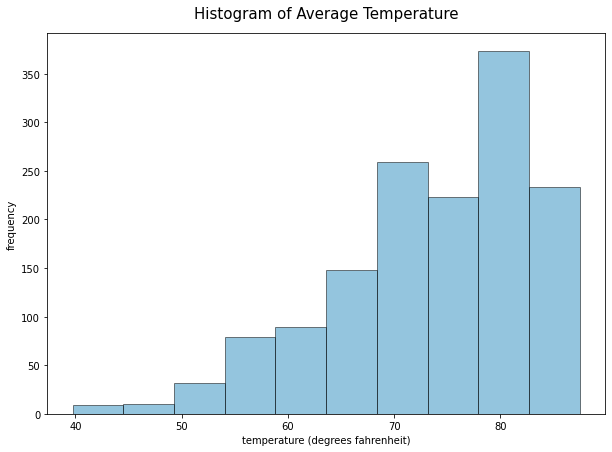

In [64]:
num_bins = 10

fig, ax = plt.subplots(figsize = (10,7))

n, bins, patches = ax.hist(metadata['WDWMEANTEMP'], num_bins, facecolor='#2b8cbe', alpha=0.5, edgecolor='#000000', linewidth=1)

ax.set_title('Histogram of Average Temperature', fontsize = 15, pad=15)
ax.set_xlabel('temperature (degrees fahrenheit)')
ax.set_ylabel('frequency')

plt.show()

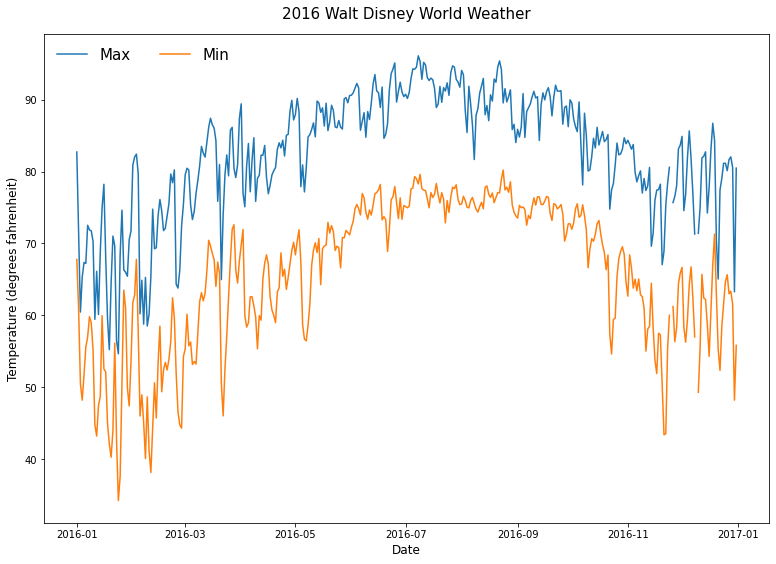

In [65]:
sixteen = metadata[(metadata['DATE'].dt.year==2016)]

fig, ax = plt.subplots(figsize = (13,9))

ax.plot(sixteen['DATE'], sixteen['WDWMAXTEMP'], label='Max')
ax.plot(sixteen['DATE'], sixteen['WDWMINTEMP'], label='Min')

ax.set_title('2016 Walt Disney World Weather', pad=15, fontsize = 15)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Temperature (degrees fahrenheit)', fontsize=12)

ax.legend(ncol = 2, loc = 'upper left', prop={'size':15}).draw_frame(False)

plt.show()

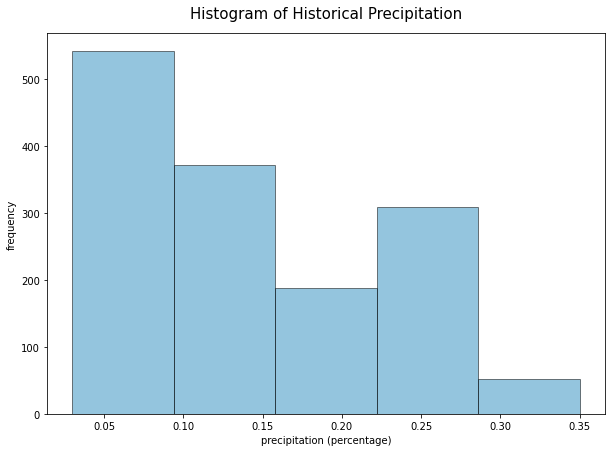

In [66]:
num_bins = 5

fig, ax = plt.subplots(figsize = (10,7))

n, bins, patches = ax.hist(metadata['WEATHER_WDWPRECIP'], num_bins, facecolor='#2b8cbe', alpha=0.5, edgecolor='#000000', linewidth=1)

ax.set_title('Histogram of Historical Precipitation', fontsize = 15, pad=15)
ax.set_xlabel('precipitation (percentage)')
ax.set_ylabel('frequency')

plt.show()

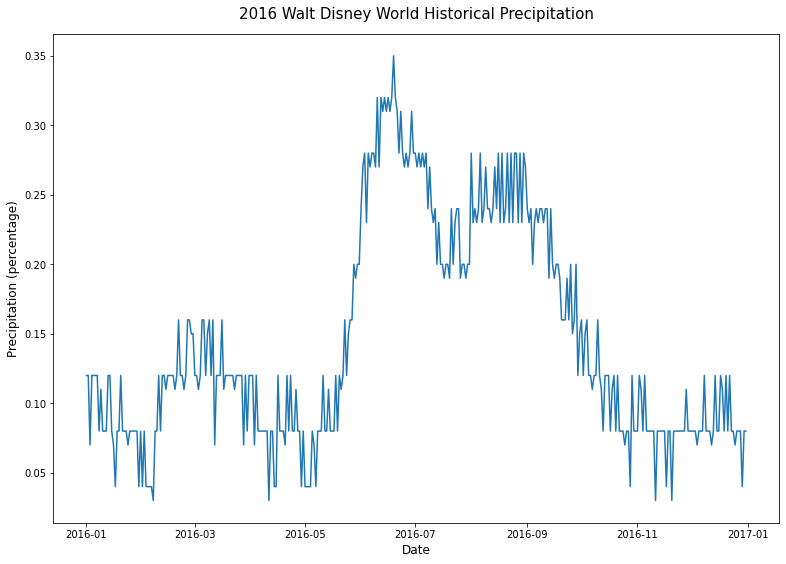

In [67]:
sixteen = metadata[(metadata['DATE'].dt.year==2016)]

fig, ax = plt.subplots(figsize = (13,9))

ax.plot(sixteen['DATE'], sixteen['WEATHER_WDWPRECIP'])

ax.set_title('2016 Walt Disney World Historical Precipitation', pad=15, fontsize = 15)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Precipitation (percentage)', fontsize=12)

plt.show()

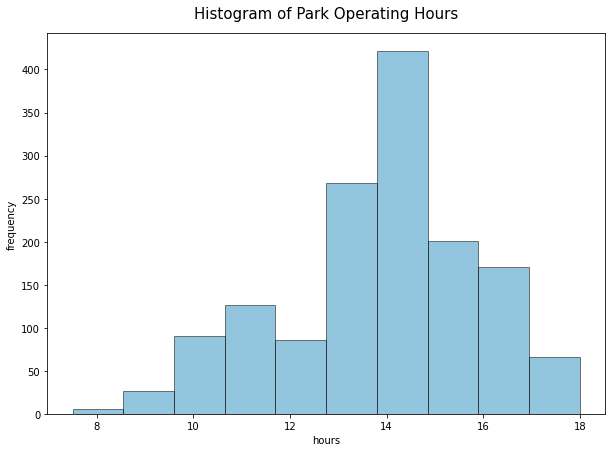

In [68]:
num_bins = 10

fig, ax = plt.subplots(figsize = (10,7))

n, bins, patches = ax.hist(metadata['MKHOURSEMH'], num_bins, facecolor='#2b8cbe', alpha=0.5, edgecolor='#000000', linewidth=1)

ax.set_title('Histogram of Park Operating Hours', fontsize = 15, pad=15)
ax.set_xlabel('hours')
ax.set_ylabel('frequency')

plt.show()

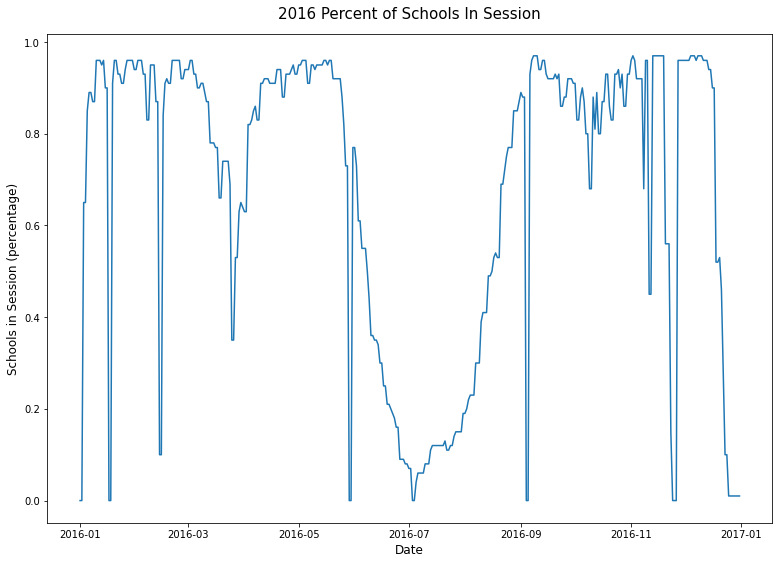

In [69]:
sixteen = metadata[(metadata['DATE'].dt.year==2016)]

fig, ax = plt.subplots(figsize = (13,9))

ax.plot(sixteen['DATE'], sixteen['inSession'])


ax.set_title('2016 Percent of Schools In Session', pad=15, fontsize = 15)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Schools in Session (percentage)', fontsize=12)


plt.show()

### Dummy Variables for Categorical Variables

In [70]:
metadata_cat = pd.DataFrame(metadata, columns=['WDWSEASON', 'PARTYSEASON_WDW', 'DAY'])
metadata_cat

,WDWSEASON,PARTYSEASON_WDW,DAY
0,CHRISTMAS PEAK,NONE,Friday
1,CHRISTMAS,NONE,Saturday
2,CHRISTMAS,NONE,Sunday
3,CHRISTMAS,NONE,Monday
4,CHRISTMAS,NONE,Tuesday
...,...,...,...
1763,CHRISTMAS PEAK,NONE,Friday
1764,CHRISTMAS PEAK,NONE,Saturday
1765,CHRISTMAS PEAK,NONE,Sunday
1766,CHRISTMAS PEAK,NONE,Monday


In [71]:
# get dummy variables
metadata_dummy = pd.get_dummies(metadata_cat, prefix=['SEASON_', 'PARTY_', 'DAY_'])
metadata_dummy

,SEASON__CHRISTMAS,SEASON__CHRISTMAS PEAK,SEASON__COLUMBUS DAY,SEASON__EASTER,SEASON__FALL,SEASON__HALLOWEEN,SEASON__JERSEY WEEK,SEASON__JULY 4TH,SEASON__MARDI GRAS,SEASON__MARTIN LUTHER KING JUNIOR DAY,...,PARTY__MNSSHP,PARTY__MVMCP,PARTY__NONE,DAY__Friday,DAY__Monday,DAY__Saturday,DAY__Sunday,DAY__Thursday,DAY__Tuesday,DAY__Wednesday
0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1763,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
1764,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1765,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1766,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0


In [72]:
for col in metadata_dummy.columns:
    print(col)

SEASON__CHRISTMAS
SEASON__CHRISTMAS PEAK
SEASON__COLUMBUS DAY
SEASON__EASTER
SEASON__FALL
SEASON__HALLOWEEN
SEASON__JERSEY WEEK
SEASON__JULY 4TH
SEASON__MARDI GRAS
SEASON__MARTIN LUTHER KING JUNIOR DAY
SEASON__MEMORIAL DAY
SEASON__PRESIDENTS WEEK
SEASON__SEPTEMBER LOW
SEASON__SPRING
SEASON__SUMMER BREAK
SEASON__THANKSGIVING
SEASON__WINTER
PARTY__MNSSHP
PARTY__MVMCP
PARTY__NONE
DAY__Friday
DAY__Monday
DAY__Saturday
DAY__Sunday
DAY__Thursday
DAY__Tuesday
DAY__Wednesday


#### Merge dummy variables and metadata

In [73]:
#concat the two dataframes
meta = pd.concat([metadata, metadata_dummy], axis=1)
#drop columns
meta.drop(labels=['WDWSEASON', 'PARTYSEASON_WDW', 'DAY'], axis=1, inplace=True)
meta.head()

,DATE,WDWMAXTEMP,WDWMINTEMP,WDWMEANTEMP,inSession,MKHOURSEMH,MKHOURSEMHYEST,MKHOURSEMHTOM,WEATHER_WDWPRECIP,MKPRDDAY,...,PARTY__MNSSHP,PARTY__MVMCP,PARTY__NONE,DAY__Friday,DAY__Monday,DAY__Saturday,DAY__Sunday,DAY__Thursday,DAY__Tuesday,DAY__Wednesday
0,2016-01-01,82.73,67.78,75.26,0.00,18.0,19.0,18.0,0.12,2,...,0,0,1,1,0,0,0,0,0,0
1,2016-01-02,71.74,60.96,66.35,0.00,18.0,18.0,14.0,0.12,2,...,0,0,1,0,0,1,0,0,0,0
2,2016-01-03,60.45,50.47,55.46,0.65,14.0,18.0,15.0,0.07,2,...,0,0,1,0,0,0,1,0,0,0
3,2016-01-04,65.31,48.19,56.75,0.65,15.0,14.0,13.0,0.12,2,...,0,0,1,0,1,0,0,0,0,0
4,2016-01-05,67.36,51.74,59.55,0.85,13.0,15.0,14.0,0.12,2,...,0,0,1,0,0,0,0,0,1,0


In [74]:
meta.dtypes

DATE                                     datetime64[ns]
WDWMAXTEMP                                      float64
WDWMINTEMP                                      float64
WDWMEANTEMP                                     float64
inSession                                       float64
MKHOURSEMH                                      float64
MKHOURSEMHYEST                                  float64
MKHOURSEMHTOM                                   float64
WEATHER_WDWPRECIP                               float64
MKPRDDAY                                          int64
MKPRDNGT                                          int64
SEASON__CHRISTMAS                                 uint8
SEASON__CHRISTMAS PEAK                            uint8
SEASON__COLUMBUS DAY                              uint8
SEASON__EASTER                                    uint8
SEASON__FALL                                      uint8
SEASON__HALLOWEEN                                 uint8
SEASON__JERSEY WEEK                             

## Merge Pirates & Metadata Data Frames

### Pirates & Metadata Dummy Variables Merge
Use for final modeling.

In [75]:
# merge the two dataframes with many-to-one
pirates_cln = pd.merge(pirates, meta, 
               how='left', left_on='date', right_on='DATE', 
               validate='many_to_one')

In [76]:
pirates_cln.head(2)

,date,datetime,wait_time,DATE,WDWMAXTEMP,WDWMINTEMP,WDWMEANTEMP,inSession,MKHOURSEMH,MKHOURSEMHYEST,...,PARTY__MNSSHP,PARTY__MVMCP,PARTY__NONE,DAY__Friday,DAY__Monday,DAY__Saturday,DAY__Sunday,DAY__Thursday,DAY__Tuesday,DAY__Wednesday
0,2016-01-01,2016-01-01 08:07:00,5.0,2016-01-01,82.73,67.78,75.26,0.0,18.0,19.0,...,0,0,1,1,0,0,0,0,0,0
1,2016-01-01,2016-01-01 08:14:00,5.0,2016-01-01,82.73,67.78,75.26,0.0,18.0,19.0,...,0,0,1,1,0,0,0,0,0,0


In [77]:
pirates_cln.drop(labels=['date', 'DATE'], axis=1, inplace=True)
pirates_cln.head(2)

,datetime,wait_time,WDWMAXTEMP,WDWMINTEMP,WDWMEANTEMP,inSession,MKHOURSEMH,MKHOURSEMHYEST,MKHOURSEMHTOM,WEATHER_WDWPRECIP,...,PARTY__MNSSHP,PARTY__MVMCP,PARTY__NONE,DAY__Friday,DAY__Monday,DAY__Saturday,DAY__Sunday,DAY__Thursday,DAY__Tuesday,DAY__Wednesday
0,2016-01-01 08:07:00,5.0,82.73,67.78,75.26,0.0,18.0,19.0,18.0,0.12,...,0,0,1,1,0,0,0,0,0,0
1,2016-01-01 08:14:00,5.0,82.73,67.78,75.26,0.0,18.0,19.0,18.0,0.12,...,0,0,1,1,0,0,0,0,0,0


In [78]:
pirates_cln.tail(2)

,datetime,wait_time,WDWMAXTEMP,WDWMINTEMP,WDWMEANTEMP,inSession,MKHOURSEMH,MKHOURSEMHYEST,MKHOURSEMHTOM,WEATHER_WDWPRECIP,...,PARTY__MNSSHP,PARTY__MVMCP,PARTY__NONE,DAY__Friday,DAY__Monday,DAY__Saturday,DAY__Sunday,DAY__Thursday,DAY__Tuesday,DAY__Wednesday
194227,2019-12-31 23:48:00,10.0,69.28,44.68,56.98,0.0,18.0,17.0,14.0,0.08,...,0,0,1,0,0,0,0,0,1,0
194228,2019-12-31 23:55:00,10.0,69.28,44.68,56.98,0.0,18.0,17.0,14.0,0.08,...,0,0,1,0,0,0,0,0,1,0


In [79]:
# save clean version
pirates_cln.to_csv('data/pirates.csv', index=False)

## Addtional EDA with final DF

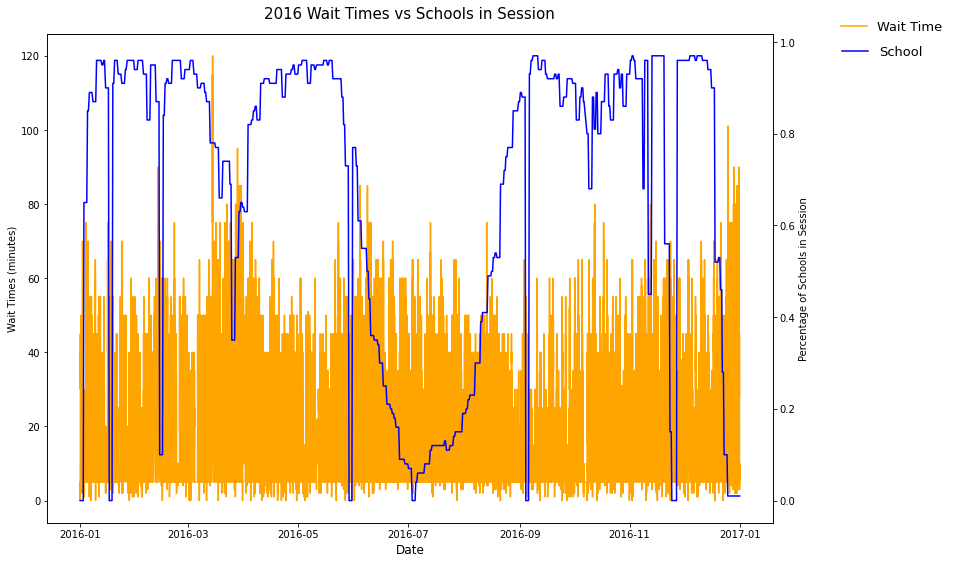

In [80]:
sixteen = pirates_cln[(pirates_cln['datetime'].dt.year==2016)]

wait_time = sixteen['wait_time']
school = sixteen['inSession']

fig, ax1 = plt.subplots(figsize = (13,9))


ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Wait Times (minutes)')
ax1.plot(sixteen['datetime'], wait_time, color='orange', label='Wait Time')

ax2 = ax1.twinx()

ax2.set_ylabel('Percentage of Schools in Session')
ax2.plot(sixteen['datetime'], school, color='blue', label='School')

ax1.set_title('2016 Wait Times vs Schools in Session', pad=15, fontsize = 15)

ax1.legend(loc = 0, prop={'size':13}, bbox_to_anchor=(1.25, 1.05)).draw_frame(False)
ax2.legend(loc=2, prop={'size':13}, bbox_to_anchor=(1.08, 1)).draw_frame(False)

plt.show()